In [1]:
%load_ext tikzmagic

# 분산과 표준 편차

데이터 집합의 특성을 나타내기 위해 사용되는 대표적인 특징 값으로는 **분산(variance)** 또는 **표준 편차(standard deviation)**도 많이 사용된다. 평균이나 기댓값이 분포의 위치를 대표하는 것이라면 분산은 분포의 폭(width)을 대표하는 값이다. 표준 편차는 분산에 대한 양의 제곱근(square root)값이다.

$$ \text{표준 편차} = \sqrt{\text{분산}} $$

분산도 평균과 마찬가지로 자료 값 집합에 대한 샘플 분산과 확률 분포에 대한 분산을 정의할 수 있다.

## 샘플 분산

샘플 분산은 주어진 자료 값의 집합에서 다음과 같은 식으로 구한다. 식에서 $x_i$는 $N$개의 자료 중 $i$번재의 자료를 나타내고 $m$은 샘플 평균이다.

$$ s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m)^2 $$

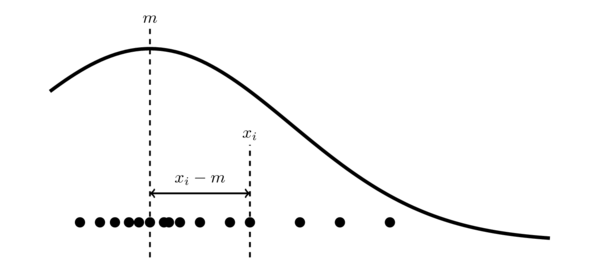

In [6]:
%%tikz -p pgfplots,pgffor -s 600,300
\begin{axis}[hide axis, width=400pt, height=200pt, line width=2pt, ymax=0.25]
\addplot[domain=-1:4,samples=100]{exp(-(x-0)^2 / (2^2)) / (2 * sqrt(2*pi))};
\foreach \x in {-0.7, -0.5, -0.35, -0.21, -0.11, 0, 0.14, 0.19, 0.3, 0.5, 0.8, 1.0, 1.5, 1.9, 2.4} {
  \edef\temp{\noexpand\fill (axis cs:\x, 0.02) circle (3pt);}\temp
}
\node at (axis cs:0,0.23) {$m$};
\draw[line width=1pt, dashed](axis cs:0,-0.1) -- (axis cs:0,0.22);
\node at (axis cs:1,0.11) {$x_i$};
\draw[line width=1pt, dashed](axis cs:1,-0.1) -- (axis cs:1,0.1);
\draw[line width=1pt, <->](axis cs:0,0.05) -- (axis cs:1,0.05);
\node at (axis cs:0.5,0.065) {$x_i-m$};
\end{axis}

위의 그림에서 볼 수 있듯이 이 식은 자료값과 평균 사이의 거리를 의미한다. 다만 자료값이 평균보다 작을 때는 음수가 나오므로 제곱을 하여 모두 양수로 만들어 준 것이다. 

위 식에서 구한 샘플 분산은 정확하게 말하면 편향 오차를 가진 **편향 샘플 분산(biased sample variance)**이다. 이와 대조되는 **비편향 샘플 분산(unbiased sample variance)**은 다음과 같이 구한다.

$$ s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m)^2 $$

## 확률 분포의 분산

확률 분포는 확률 밀도 함수 $f(x)$로 분포 전체의 모양을 정확하게 정의할 수 있으므로 다음과 같이 이론적인 분산을 구할 수 있다.

분산을 구하는 연산자는 영어 Variance를 따서 $\text{Var}[\cdot]$로 표기하고 이 연산자로 계산된 분산값은 $\sigma^2$으로 표기한다.

$$ \sigma^2 = \text{Var}[X] = \text{E}[(X - \mu)^2] $$

이산 확률 변수의 경우에는 확률 질량 함수 $P(x)$를 사용하여 분산을 구한다.

$$ \sigma^2 = \text{Var}[X] = \text{E}[(X - \mu)^2] =  \sum (x - \mu)^2 P(x)$$

이산 확률 변수의 경우에는 확률 밀도 함수 $f(x)$를 사용하여 분산을 구한다.

$$ \sigma^2 = \text{Var}[X] = \text{E}[(X - \mu)^2] = \int_{-\infty}^{\infty} (x - \mu)^2 f(x)dx$$

즉, 분산은 평균으로부터 데이터까지의 거리 제곱을 확률 $P(x)$ 또는 확률 밀도 $f(x)$를 가중치로 하여 평균한 것으로 볼 수 있다.

## 분산의 성질

분산은 다음과 같은 성질을 만족한다.


* 0 또는 양수
$$ \text{Var}[X] \geq 0 $$

* 랜덤 변수가 아닌 상수 값 $c$에 대해 
$$ \text{Var}[c] = 0 $$
$$ \text{Var}[cX] = c^2 \text{Var}[X] $$


또한 기댓값의 성질을 이용하여 다음 성질을 증명할 수 있다.

$$ \text{Var}[X] = \text{E}[X^2] - (\text{E}[X])^2  = \text{E}[X^2] - \mu^2 $$

또는

$$ \text{E}[X^2] = \mu^2 + \text{Var}[X] $$

(증명)

$$ 
\begin{eqnarray}
\text{Var}[X] 
&=& \text{E}[(X - \mu)^2] \\
&=& \text{E}[X^2 - 2\mu X + \mu^2] \\
&=& \text{E}[X^2] - 2\mu\text{E}[X] + \mu^2 \\
&=& \text{E}[X^2] - 2\mu^2 + \mu^2 \\
&=& \text{E}[X^2] - \mu^2\\
\end{eqnarray}
$$

## 두 확률 변수의 합의 분산

두 확률 변수 $X$, $Y$의 합의 분산은 각 확률 변수의 분산의 합과 다음과 같은 관계가 있다.

$$
\text{Var}\left[ X + Y \right] =
\text{Var}\left[ X \right] + \text{Var}\left[ Y \right]+ 2\text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right]
$$

마지막 항은 양수도 될 수 있고 음수도 될 수 있다.

증명은 다음과 같다.

$$ 
\begin{eqnarray}
\text{Var}\left[ X + Y \right] 
&=& \text{E}\left[ (X + Y - (\mu_X + \mu_Y))^2 \right] \\
&=& \text{E}\left[ ((X -\mu_X) + (Y - \mu_Y))^2 \right] \\
&=& \text{E}\left[ (X -\mu_X)^2 + (Y - \mu_Y)^2 + 2(X-\mu_X)(Y-\mu_Y) \right] \\
&=& \text{E}\left[ (X -\mu_X)^2 \right] + \text{E}\left[ (Y - \mu_Y)^2 \right] + 2\text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right] 
\end{eqnarray}
$$


그런데 이 두 확률 변수 $X$, $Y$가 서로 독립이면 다음처럼 두 확률 변수의 분산의 합이 두 확률 변수의 합의 분산과 같아진다.

$$ \text{Var}\left[ X + Y \right] =  \text{Var}\left[ X \right] + \text{Var}\left[ Y \right] $$

확률 변수가 독립이라는 것은 서로 영향을 미치지 않는 것을 의미하며 확률 변수의 독립의 수학적 정의는 다음에 설명하기로 한다.

두 확률 변수 $X$, $Y$가 서로 독립이면 다음 식이 성립한다. 이 식은 추후에 확률 변수의 독립을 설명할 때 증명하기로 한다.

$$ \text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right] = 0 $$

위 식을 이용하면 독립인 두 확률 변수의 합의 분산은 분산의 합과 같다는 것을 보일 수 있다.


## 샘플 평균의 분산

확률 변수 $X$의 샘플 평균 $\bar{X}$도 일종의 확률 변수이고 그 기댓값 $\text{E}[\bar{X}]$은 원래 확률 변수 $X$의 기댓값 $\text{E}[{X}]$과 일치한다는 것을 증명한 적이 있다.

$$ \text{E}[\bar{X}] = \text{E}[{X}]$$

샘플 평균$\bar{X}$의 분산 $\text{Var}[\bar{X}]$은 원래 확률 변수 $X$의 분산 $\text{Var}[{X}]$과 다음 관계를 가진다.

$$ \text{Var}[\bar{X}] = \dfrac{1}{N} \text{Var}[{X}]  $$



증명은 다음과 같다.

$$ 
\begin{eqnarray}
\text{Var}[\bar{X}] 
&=& \text{Var} \left[ \dfrac{1}{N} \sum_{i=1}^N X_i \right] \\
&=& \text{E} \left[ \left( \dfrac{1}{N} \sum_{i=1}^N X_i - \mu \right)^2 \right] \\
&=& \text{E} \left[ \left( \dfrac{1}{N} \sum_{i=1}^N X_i - \dfrac{1}{N}N\mu \right)^2 \right] \\
&=& \text{E} \left[ \left( \dfrac{1}{N} \left( \sum_{i=1}^N X_i - N\mu \right) \right)^2 \right] \\
&=& \text{E} \left[ \left( \dfrac{1}{N} \sum_{i=1}^N (X_i - \mu) \right)^2 \right] \\
&=& \text{E} \left[ \dfrac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N (X_i - \mu) (X_j - \mu)  \right] \\
&=& \dfrac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N \text{E} \left[  (X_i - \mu) (X_j - \mu)  \right] \\
\end{eqnarray}
$$

여기에서 $X_i$와 $X_j$ ($ i \neq j $)가 독립일 때 

$$ \text{E}\left[ (X_i-\mu)(X_j-\mu) \right] = 0 $$

라는 사실을 이용하면 $i=j$인 항, 즉 제곱항만 남는다.

$$
\begin{eqnarray}
\text{Var}[\bar{X}]
&=& \dfrac{1}{N^2} \sum_{i=1}^N \text{E} \left[ (X_i - \mu)^2 \right] \\
&=& \dfrac{1}{N^2} \sum_{i=1}^N \text{E} \left[ (X - \mu)^2 \right] \\
&=& \dfrac{1}{N^2} N \text{E} \left[ (X - \mu)^2 \right] \\
&=& \dfrac{1}{N} \text{E} \left[ (X - \mu)^2 \right] \\
&=& \dfrac{1}{N} \text{Var}[X] \\
\end{eqnarray}
$$ 


## 샘플 분산의 기댓값

샘플 분산 $s^2$의 기대값을 구하면 이론적인 분산  $\sigma^2$의 $\dfrac{N - 1}{N}$ 배가 된다.

$$
\text{E}[s^2] = \dfrac{N-1}{N}\sigma^2 
$$

증명은 다음과 같다.

$$ 
\begin{eqnarray}
\text{E}[s^2] 
&=& \text{E} \left[ \dfrac{1}{N}\sum_{i=1}^N (X_i - \bar{X})^2 \right] 
= \text{E} \left[ \dfrac{1}{N}\sum_{i=1}^N \left\{ (X_i -\mu) - (\bar{X} - \mu) \right \}^2  \right] \\
&=& \text{E} \left[ \dfrac{1}{N}\sum_{i=1}^N \left\{ (X_i -\mu)^2 - 2 (X_i -\mu)(\bar{X} - \mu) +  (\bar{X} - \mu)^2 \right \}  \right] \\
&=&  \text{E} \left[ \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)^2 \right] 
  - 2 \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)(\bar{X} - \mu) } \right] 
  +  \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (\bar{X} - \mu)^2 } \right] 
\end{eqnarray} 
$$

이 때 첫번째 항은

$$ 
\begin{eqnarray}
\text{E} \left[ \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)^2 \right] 
&=& \text{E} \left[ \dfrac{1}{N} \sum_{i=1}^N (X -\mu)^2 \right] \\
&=& \text{E} \left[ \dfrac{1}{N} N (X -\mu)^2 \right] \\
&=& \text{E} \left[ (X -\mu)^2 \right] \\
&=& \text{Var}[X] \\
&=& \sigma^2 
\end{eqnarray} 
$$ 

두번째 항은

$$
\begin{eqnarray}
\text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)(\bar{X} - \mu) } \right] 
&=& \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N \left( \left( \dfrac{1}{N} \sum_{j=1}^N X_j - \mu \right) -\mu \right)(\bar{X} - \mu) } \right] \\
&=& \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu) \left( \dfrac{1}{N} \sum_{j=1}^N X_j - \mu \right) } \right]  \\
&=& \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu) \left( \dfrac{1}{N} \sum_{j=1}^N ( X_j - \mu ) \right) } \right]  \\
&=& \text{E} \left[ { \dfrac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N (X_i -\mu)  ( X_j - \mu )} \right]  \\
&=& \dfrac{1}{N} \text{Var}[X] \\
&=& \dfrac{\sigma^2}{N}
\end{eqnarray} 
$$

세번째 항은

$$
\begin{eqnarray}
\text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (\bar{X} - \mu)^2 } \right]
&=& \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N \left( \dfrac{1}{N} \sum_{j=1}^N X_j - \mu \right)^2 } \right]  \\
&=& \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N \left( \dfrac{1}{N} \sum_{j=1}^N (X_j - \mu) \right)^2 } \right]  \\
&=& \text{E} \left[ { \dfrac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N (X_i -\mu)  ( X_j - \mu )} \right]  \\
&=& \dfrac{1}{N} \text{Var}[X] \\
&=& \dfrac{\sigma^2}{N}
\end{eqnarray} 
$$

이 되므로 세 항의 합은 다음과 같아진다.

$$
\text{E}[s^2] = \sigma^2 - \dfrac{2\sigma^2}{N} + \dfrac{\sigma^2}{N} = \dfrac{N-1}{N}\sigma^2 
$$

따라서 샘플 분산의 기대값이 정확하게 $\sigma^2$이 되려면 거리 제곱의 평균을 구할 때 분모가 $N$이 아니라 $N-1$이 되어야 한다.

$$
\sigma^2 
= \dfrac{N}{N-1} \text{E}[s^2] 
= \dfrac{N}{N-1} \text{E} \left[ \dfrac{1}{N} \sum (X_i-\bar{X})^2 \right] 
= \text{E} \left[ \dfrac{1}{N-1} \sum (X_i-\bar{X})^2 \right] 
= \text{E} \left[ s^2_{\text{unbiased}} \right] 
$$

## 파이썬을 사용한 계산

파이썬에서 샘플 분산과 샘플 표준 편차는 numpy의 다음 함수들을 사용한다.

* [`var()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)
* [`std()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)
* [`nanvar()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanvar.html)
* [`nanstd()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanstd.html)

In [157]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)  # mean=0, standard deviation=2

In [158]:
np.var(x)

3.8969378252486169

In [160]:
np.var(x, ddof=1)  # unbiased variance

3.9008386639125292